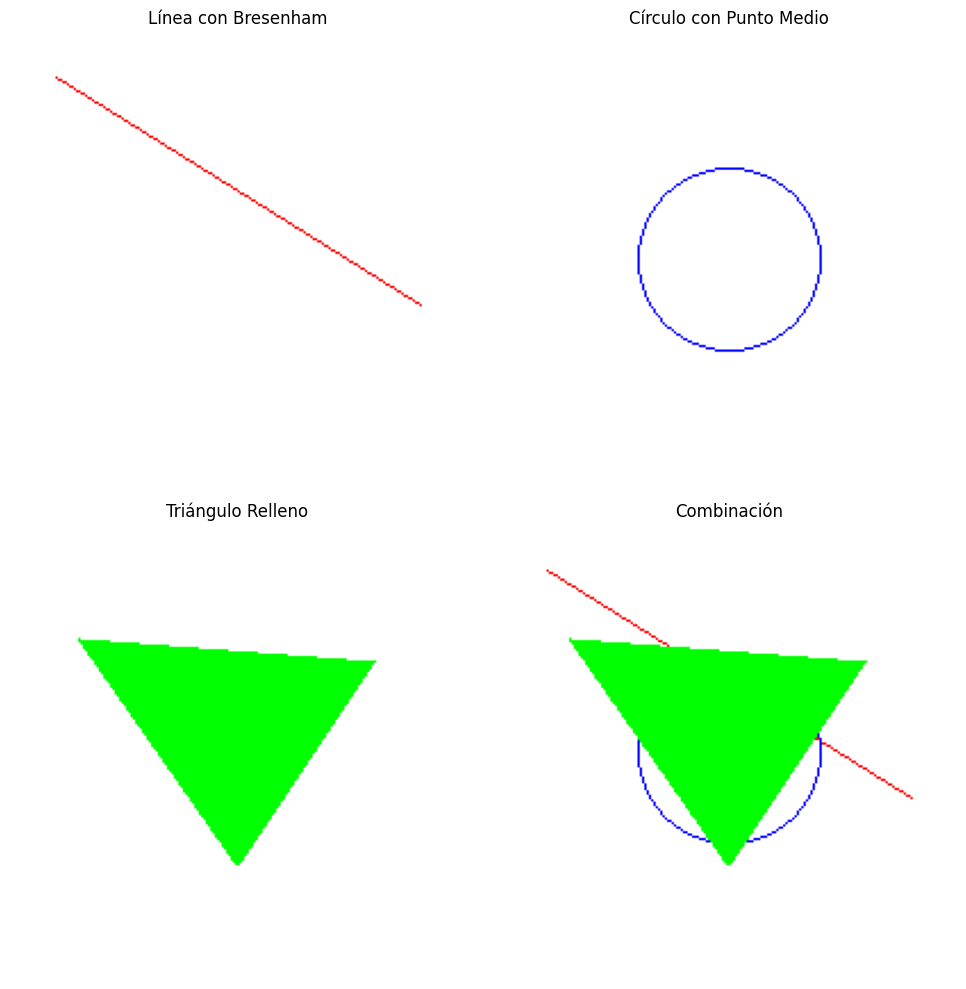

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del lienzo
width, height = 200, 200

def nuevo_lienzo(color=(255, 255, 255)):
    """Crea un lienzo RGB con color de fondo."""
    lienzo = np.ones((height, width, 3), dtype=np.uint8)
    lienzo[:] = color
    return lienzo

# Línea: Algoritmo de Bresenham
def linea_bresenham(canvas, x0, y0, x1, y1, color=(255, 0, 0)):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        if 0 <= x0 < width and 0 <= y0 < height:
            canvas[y0, x0] = color
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy
    return canvas

# Círculo: Algoritmo del Punto Medio
def circulo_punto_medio(canvas, x0, y0, r, color=(0, 0, 255)):
    x = r
    y = 0
    p = 1 - r
    while x >= y:
        for dx, dy in [(x, y), (y, x), (-x, y), (-y, x),
                       (-x, -y), (-y, -x), (x, -y), (y, -x)]:
            px, py = x0 + dx, y0 + dy
            if 0 <= px < width and 0 <= py < height:
                canvas[py, px] = color
        y += 1
        if p <= 0:
            p += 2 * y + 1
        else:
            x -= 1
            p += 2 * y - 2 * x + 1
    return canvas

# Triángulo: Relleno por escaneo
def rellenar_triangulo(canvas, p1, p2, p3, color=(0, 255, 0)):
    pts = sorted([p1, p2, p3], key=lambda p: p[1])
    (x1, y1), (x2, y2), (x3, y3) = pts

    def interp(y0, y1, x0, x1):
        if y1 - y0 == 0:
            return []
        return [int(x0 + (x1 - x0) * (y - y0) / (y1 - y0)) for y in range(y0, y1)]

    x12 = interp(y1, y2, x1, x2)
    x23 = interp(y2, y3, x2, x3)
    x13 = interp(y1, y3, x1, x3)

    x_left = x13
    x_right = x12 + x23

    min_len = min(len(x_left), len(x_right))
    for i in range(min_len):
        y = y1 + i
        xl, xr = x_left[i], x_right[i]
        for x in range(min(xl, xr), max(xl, xr) + 1):
            if 0 <= x < width and 0 <= y < height:
                canvas[y, x] = color
    return canvas

# Mostrar resultados
def mostrar_figuras():
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()

    titulos = [
        "Línea con Bresenham",
        "Círculo con Punto Medio",
        "Triángulo Relleno",
        "Combinación"
    ]

    lienzos = [
        linea_bresenham(nuevo_lienzo(), 20, 20, 180, 120),
        circulo_punto_medio(nuevo_lienzo(), 100, 100, 40),
        rellenar_triangulo(nuevo_lienzo(), (30, 50), (100, 150), (160, 60)),
        rellenar_triangulo(
            circulo_punto_medio(
                linea_bresenham(nuevo_lienzo(), 20, 20, 180, 120),
                100, 100, 40
            ),
            (30, 50), (100, 150), (160, 60)
        )
    ]

    for ax, img, titulo in zip(axs, lienzos, titulos):
        ax.imshow(img)
        ax.set_title(titulo)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

mostrar_figuras()
